# Data Exploration

- Data Schema

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it: 

![Data Schema](https://i.imgur.com/HRhd2Y0.png)

## import all necessary libraries

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_rows', 10)

%matplotlib inline

## Load Data

In [2]:
try:
    from google.colab import drive

    # Mount the folder "drive" on google drive to Colab Notebook
    drive.mount('/content/drive')
    path = '/content/drive/My Drive/wids-taipei/2020-WiDS-Taipei-MLCC-Workshop/dataset/*.csv'
except ModuleNotFoundError:
    path = '../dataset/*.csv'

In [3]:
filenames = glob.glob(path)
pd_dict = {}

for filename in filenames:
    name = filename.split("/")[-1].split(".")[0]
    pd_dict[name] = pd.read_csv(os.path.join(filename))
    
for key,value in pd_dict.items():
    print(key)

olist_sellers_dataset
product_category_name_translation
olist_orders_dataset
olist_order_items_dataset
olist_customers_dataset
olist_geolocation_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset


In [4]:
payments_data = pd_dict['olist_order_payments_dataset']
orders_data = pd_dict['olist_orders_dataset']
customers_data = pd_dict['olist_customers_dataset']

products_data = pd_dict['olist_products_dataset']
order_items_data = pd_dict['olist_order_items_dataset']

category_name_translation = pd_dict['product_category_name_translation']

## Data Exploration - Products

### Products Dataset

This dataset includes data about the products sold by Olist.

- product_id: unique product identifier
- product_category_name: root category of product, in Portuguese.
- product_name_lenght: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos.
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product_height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

In [5]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Data Exploration

1. translate the name
2. how many different products
3. how many category
4. plot the distribution per category

In [6]:
# Convert the translations to dictionary format
translations = category_name_translation.set_index('product_category_name')['product_category_name_english'].to_dict()

# translate the product category column in the products df to English
products_data['product_category_name'] = products_data['product_category_name'].map(translations)

In [7]:
products_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Total products 32951
Total categories:  72


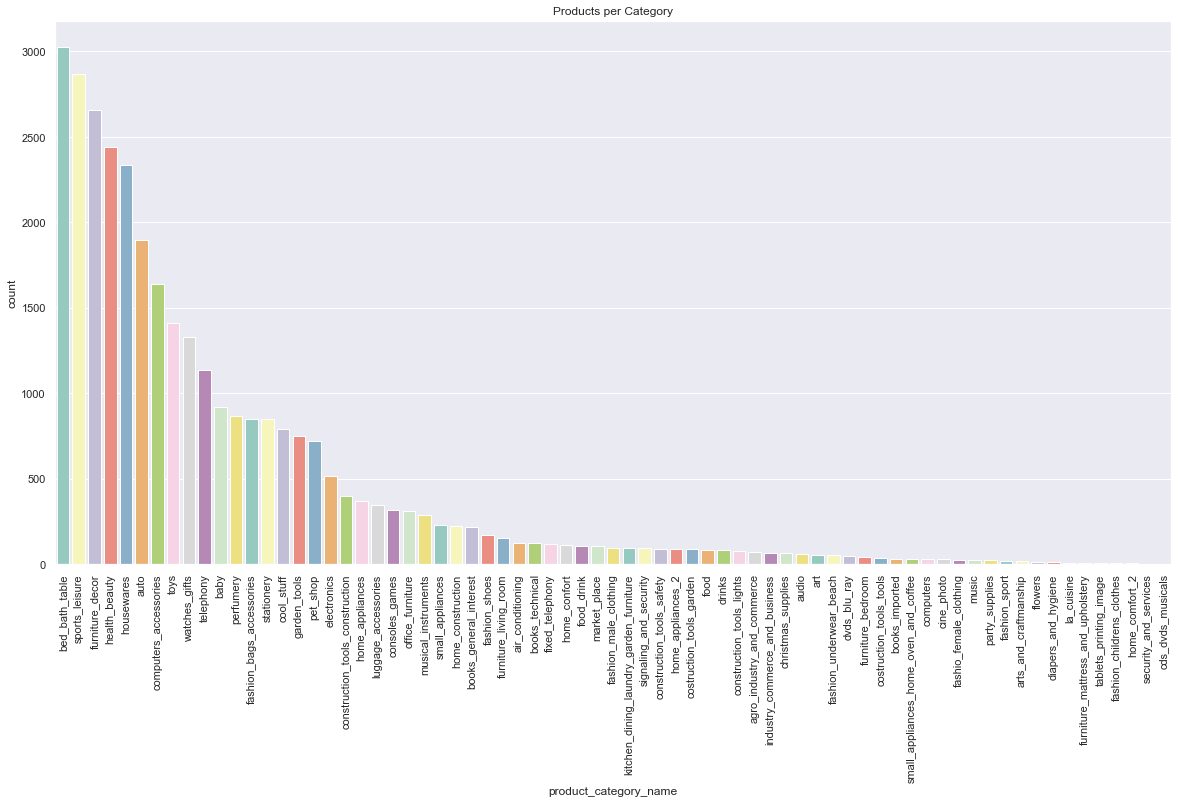

In [8]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.countplot(x='product_category_name', 
              data=products_data,
              order=products_data['product_category_name'].value_counts().sort_values(ascending=False).index,
              palette='Set3')
plt.xticks(rotation=90)
plt.title("Products per Category")

print("Total products", len(products_data['product_id']))
print("Total categories: ", len(products_data['product_category_name'].unique()))

#### Data Cleaning

In [9]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [10]:
products_data.isnull().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
# Missing data
products_data['product_category_name'] = products_data['product_category_name'].fillna('None')
products_data['product_photos_qty'] = products_data.loc[:, 'product_photos_qty'].fillna(products_data.loc[:, 'product_photos_qty'].mean())
products_data['product_weight_g'] = products_data.loc[:, 'product_weight_g'].fillna(products_data.loc[:, 'product_weight_g'].mean())
products_data['product_length_cm'] = products_data.loc[:, 'product_length_cm'].fillna(products_data.loc[:, 'product_length_cm'].mean())
products_data['product_height_cm'] = products_data.loc[:, 'product_height_cm'].fillna(products_data.loc[:, 'product_height_cm'].mean())
products_data['product_width_cm'] = products_data.loc[:, 'product_width_cm'].fillna(products_data.loc[:, 'product_width_cm'].mean())

In [12]:
# Outlier: weight 
products_data.loc[:, 'product_weight_g'].replace(0, products_data.loc[:, 'product_weight_g'].mean(), inplace=True)
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [13]:
products_data.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [14]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Order Items Data

This dataset includes data about the items purchased within each order.

- order_id: order unique identifier (98666 unique values)
- order_item_id: sequential number identifying number of items included in the same order.
- product_id: product unique identifier. (32951 unique values)
- seller_id: seller unique identifier.
- shipping_limit_data: Shows the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

In [15]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### Data Exploration

The order_id = `00143d0f86d6fbd9f9b38ab440ac16f5` has 3 items (same product). 
Each item has the freight calculated accordingly to its measures and weight.
To get the total freight value for each order you just have to sum.

- The total order_item value is: 21.33 * 3 = 63.99
- The total freight value is: 15.10 * 3 = 45.30
- The total order value (product + freight) is: 45.30 + 63.99 = 109.29

In [16]:
order_items_data[order_items_data['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [17]:
# Check how many orders have more than one product
print("Total Orders: " + str(len(order_items_data['order_id'].unique())))
print("Total Orders with 2 or more items: " + str(len(order_items_data[order_items_data['order_item_id'] >= 2])))

Total Orders: 98666
Total Orders with 2 or more items: 13984


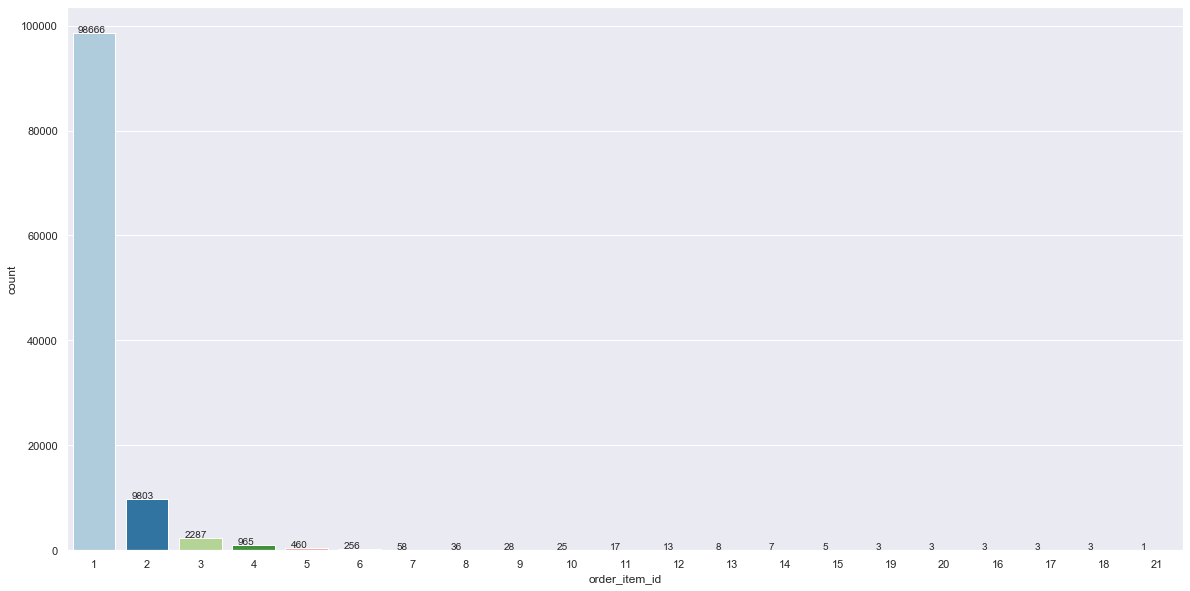

In [18]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.countplot(x='order_item_id', 
              data=order_items_data,
              order=order_items_data['order_item_id'].value_counts().sort_values(ascending=False).index,
              palette='Paired')

total = len(order_items_data['order_item_id'])

for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + (p.get_width() / 2) - 0.3
    y = p.get_y() + p.get_height() + 100
    ax.text(x, y, value, fontsize=10)

In [19]:
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


###  Combining Datasets - Orders per Product

In [20]:
# Orders per Product
# Join the two datasets
order_products = pd.merge(order_items_data, products_data, on='product_id')
order_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,garden_tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,furniture_decor,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,watches_gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


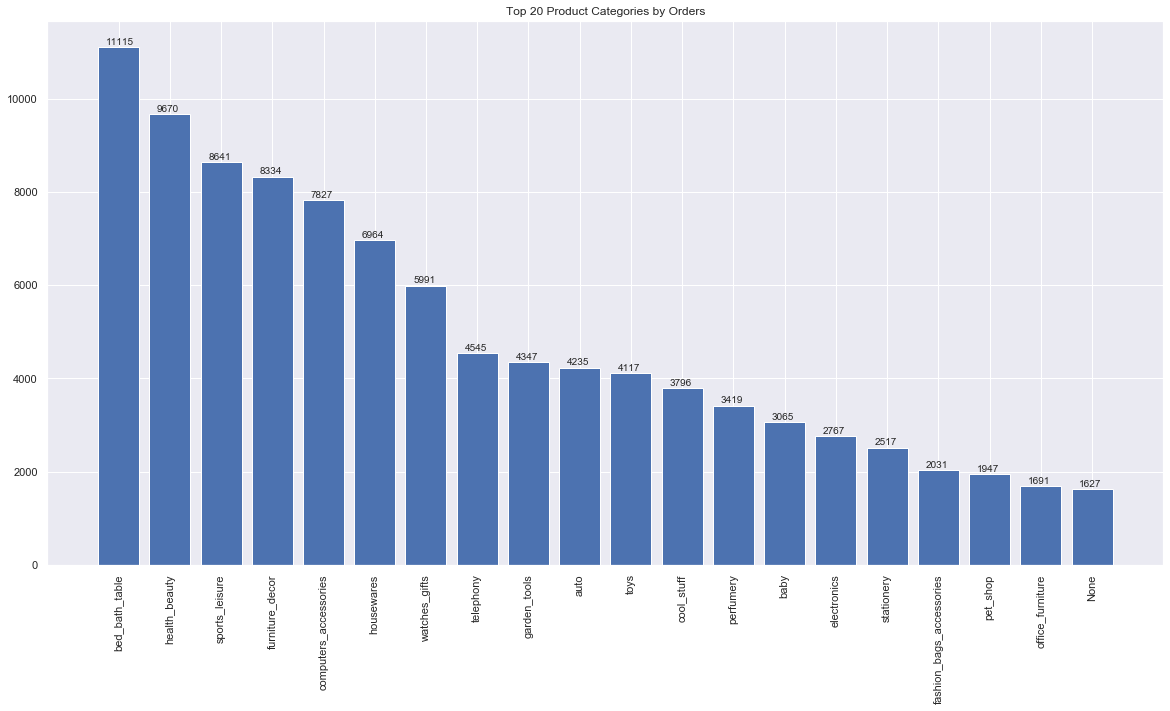

In [21]:
order_products_dict = order_products[['product_category_name','order_id']] \
    .groupby('product_category_name')['order_id'] \
    .count() \
    .sort_values(ascending=False) \
    .to_dict()

order_product_names = list(order_products_dict.keys())[:20]
order_product_values = list(order_products_dict.values())[:20]

# plot the data
f, ax1 = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
f.subplots_adjust(hspace = .2, wspace=.05)

ax1.bar(order_product_names, order_product_values)
ax1.set_title('Top 20 Product Categories by Orders')
plt.xticks(rotation =90)

# labels values
for i, value in enumerate(order_product_values):
    ax1.text(i - 0.25, 
             value + 50, 
             order_product_values[i], 
             fontsize=10)

## Association Mining

### Category Association

#### Data Preprocessing

In [22]:
order_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [23]:
# Transforming the data into the correct format
basket = order_products.groupby(['order_id', 'product_category_name'])[['order_item_id']] \
            .sum() \
            .unstack() \
            .reset_index() \
            .fillna(0) \
            .set_index('order_id')

# recode all multiple purchases to 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1: 
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

order_item_id                             \
product_category_name                     None agro_industry_and_commerce   
order_id                                                                    
00010242fe8c5a6d1ba2dd792cb16214             0                          0   
00018f77f2f0320c557190d7a144bdd3             0                          0   
000229ec398224ef6ca0657da4fc703e             0                          0   
00024acbcdf0a6daa1e931b038114c75             0                          0   
00042b26cf59d7ce69dfabb4e55b4fd9             0                          0   

                                                                             \
product_category_name            air_conditioning art arts_and_craftmanship   
order_id                                                                      
00010242fe8c5a6d1ba2dd792cb16214                0   0                     0   
00018f77f2f0320c557190d7a144bdd3                0   0                     0   
000229ec398224ef6ca0657da4fc703e                0   0                     0   
00024acbcdf0a6daa1e931b038114c75                0   0                     0   
00042b26cf59d7ce69dfabb4e55b4fd9                0   0                     0   

                                                                 \
product_category_name            audio auto baby bed_bath_table   
order_id                                                          
00010242fe8c5a6d1ba2dd792cb16214     0    0    0              0   
00018f77f2f0320c557190d7a144bdd3     0    0    0              0   
000229ec398224ef6ca0657da4fc703e     0    0    0              0   
00024acbcdf0a6daa1e931b038114c75     0    0    0              0   
00042b26cf59d7ce69dfabb4e55b4fd9     0    0    0              0   

                                                         ...  \
product_category_name            books_general_interest  ...   
order_id                                                 ...   
00010242fe8c5a6d1ba2dd792cb16214                      0  ...   
00018f77f2f0320c557190d7a144bdd3                      0  ...   
000229ec398224ef6ca0657da4fc703e                      0  ...   
00024acbcdf0a6daa1e931b038114c75                      0  ...   
00042b26cf59d7ce69dfabb4e55b4fd9                      0  ...   

                                                                               \
product_category_name            security_and_services signaling_and_security   
order_id                                                                        
00010242fe8c5a6d1ba2dd792cb16214                     0                      0   
00018f77f2f0320c557190d7a144bdd3                     0                      0   
000229ec398224ef6ca0657da4fc703e                     0                      0   
00024acbcdf0a6daa1e931b038114c75                     0                      0   
00042b26cf59d7ce69dfabb4e55b4fd9                     0                      0   

                                                   \
product_category_name            small_appliances   
order_id                                            
00010242fe8c5a6d1ba2dd792cb16214                0   
00018f77f2f0320c557190d7a144bdd3                0   
000229ec398224ef6ca0657da4fc703e                0   
00024acbcdf0a6daa1e931b038114c75                0   
00042b26cf59d7ce69dfabb4e55b4fd9                0   

                                                                        \
product_category_name            small_appliances_home_oven_and_coffee   
order_id                                                                 
00010242fe8c5a6d1ba2dd792cb16214                                     0   
00018f77f2f0320c557190d7a144bdd3                                     0   
000229ec398224ef6ca0657da4fc703e                                     0   
00024acbcdf0a6daa1e931b038114c75                                     0   
00042b26cf59d7ce69dfabb4e55b4fd9                                     0   

                                                            \
prod

In [24]:
# remove all orders with less than 2 different categories
basket_sets = basket_sets[basket_sets.sum(axis=1) > 1]
basket_sets

order_item_id                             \
product_category_name                     None agro_industry_and_commerce   
order_id                                                                    
002f98c0f7efd42638ed6100ca699b42             0                          0   
005d9a5423d47281ac463a968b3936fb             0                          0   
014405982914c2cde2796ddcf0b8703d             0                          0   
01b1a7fdae9ad1837d6ab861705a1fa5             0                          0   
01cce1175ac3c4a450e3a0f856d02734             0                          0   
...                                        ...                        ...   
fe678293ea3bb6607a15b2e320e91722             0                          0   
ff00a56fe9475a175cd651d77c707a09             0                          0   
ff40f38705c95a8eceea1a0db29bff66             0                          0   
ffa5e4c604dea4f0a59d19cc2322ac19             1                          0   
ffb8f7de8940249a3221252818937ecb             0                          0   

                                                                             \
product_category_name            air_conditioning art arts_and_craftmanship   
order_id                                                                      
002f98c0f7efd42638ed6100ca699b42                0   0                     0   
005d9a5423d47281ac463a968b3936fb                0   0                     0   
014405982914c2cde2796ddcf0b8703d                0   0                     0   
01b1a7fdae9ad1837d6ab861705a1fa5                0   0                     0   
01cce1175ac3c4a450e3a0f856d02734                0   0                     0   
...                                           ...  ..                   ...   
fe678293ea3bb6607a15b2e320e91722                0   0                     0   
ff00a56fe9475a175cd651d77c707a09                0   0                     0   
ff40f38705c95a8eceea1a0db29bff66                0   0                     0   
ffa5e4c604dea4f0a59d19cc2322ac19                0   0                     0   
ffb8f7de8940249a3221252818937ecb                0   0                     0   

                                                                 \
product_category_name            audio auto baby bed_bath_table   
order_id                                                          
002f98c0f7efd42638ed6100ca699b42     0    0    0              0   
005d9a5423d47281ac463a968b3936fb     0    0    1              0   
014405982914c2cde2796ddcf0b8703d     0    0    0              0   
01b1a7fdae9ad1837d6ab861705a1fa5     0    0    0              1   
01cce1175ac3c4a450e3a0f856d02734     0    0    0              0   
...                                ...  ...  ...            ...   
fe678293ea3bb6607a15b2e320e91722     0    0    0              0   
ff00a56fe9475a175cd651d77c707a09     0    0    0              1   
ff40f38705c95a8eceea1a0db29bff66     1    0    0              0   
ffa5e4c604dea4f0a59d19cc2322ac19     0    0    0              0   
ffb8f7de8940249a3221252818937ecb     0    1    0              0   

                                                         ...  \
product_category_name            books_general_interest  ...   
order_id                                                 ...   
002f98c0f7efd42638ed6100ca699b42                      0  ...   
005d9a5423d47281ac463a968b3936fb                      0  ...   
014405982914c2cde2796ddcf0b8703d                      0  ...   
01b1a7fdae9ad1837d6ab861705a1fa5                      0  ...   
01cce1175ac3c4a450e3a0f856d02734                      0  ...   
...                                                 ...  ...   
fe678293ea3bb6607a15b2e320e91722                      0  ...   
ff00a56fe9475a175cd651d77c707a09                      0  ...   
ff40f38705c95a8eceea1a0db29bff66                      0  ...   
ffa5e4c604dea4f0a59d19cc2322ac19                      0  ...   
ffb8f7de8940249a3221252818937ecb                      0  ...   

           

#### Data Analysis

In [25]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames = True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

df_results1 = pd.DataFrame(rules)
df_results1.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,"((order_item_id, home_confort))","((order_item_id, bed_bath_table))",0.063613,0.259542,0.054707,0.860000,3.313529,0.038197,5.288986
20,"((order_item_id, construction_tools_lights))","((order_item_id, furniture_decor))",0.022901,0.262087,0.013995,0.611111,2.331715,0.007993,1.897492
22,"((order_item_id, home_construction))","((order_item_id, furniture_decor))",0.033079,0.262087,0.016539,0.500000,1.907767,0.007870,1.475827
1,"((order_item_id, fashion_bags_accessories))","((order_item_id, None))",0.025445,0.080153,0.011450,0.450000,5.614286,0.009411,1.672450
26,"((order_item_id, perfumery))","((order_item_id, health_beauty))",0.035623,0.091603,0.015267,0.428571,4.678571,0.012004,1.589695
...,...,...,...,...,...,...,...,...,...
8,"((order_item_id, baby))","((order_item_id, furniture_decor))",0.118321,0.262087,0.015267,0.129032,0.492327,-0.015743,0.847234
0,"((order_item_id, None))","((order_item_id, bed_bath_table))",0.080153,0.259542,0.010178,0.126984,0.489262,-0.010625,0.848161
19,"((order_item_id, garden_tools))","((order_item_id, computers_accessories))",0.092875,0.066158,0.011450,0.123288,1.863541,0.005306,1.065164
3,"((order_item_id, housewares))","((order_item_id, None))",0.147583,0.080153,0.017812,0.120690,1.505747,0.005983,1.046101


## Data Exploration - Customer

### Customer Dataset

This dataset has information about the customer and its location. 
Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a `unique customer_id`.
This means that the same customer will get different ids for different orders. The purpose of having a `customer_unique_id` on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code
- customer_city: customer city name
- customer_state: customer state

In [26]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### Data Exploration

In [27]:
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
print('unique customer: ', len(customers_data['customer_unique_id'].unique()))

unique customer:  96096


In [29]:
customers_data.groupby(['customer_zip_code_prefix']).size()

customer_zip_code_prefix
1003     1
1004     2
1005     6
1006     2
1007     4
        ..
99960    2
99965    2
99970    1
99980    2
99990    1
Length: 14994, dtype: int64

In [30]:
customers_data[customers_data['customer_zip_code_prefix'] == 1004]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
11747,a09edf8c1e842e94805a206b3d73eed5,968f6d2f674977d88a4b445a5117ccd8,1004,sao paulo,SP
23990,ee9b73e88afb4904ee2322cfc89cf638,095e7c124c5c1ccb1eb9f731152eae6a,1004,sao paulo,SP


### Orders Dataset

This is the core dataset. From each order you might find all other information.

- order_id: unique identifier of the order.
- customer_id: key to the customer dataset. Each order has a unique customer_id.
- order_status: Reference to the order status (delivered, shipped, etc).
- order_purchase_timestamp: Shows the purchase timestamp.
- order_approved_at: Shows the payment approval timestamp.
- order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date: Shows the actual order delivery date to the customer.
- order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment.

In [31]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Data Exploration

In [32]:
orders_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
len(orders_data['order_id'].unique())

99441

### Payments Dataset

This dataset includes data about the orders payment options.

- order_id: unique identifier of an order.
- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

In [34]:
payments_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#### Data Exploration

In [35]:
payments_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [36]:
len(payments_data['order_id'].unique())

99440

In [37]:
payments_data[payments_data['order_id'].duplicated() == True]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [38]:
payments_data[payments_data['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27995,31bc09fdbd701a7a4f9b55b5955b8687,3,voucher,1,37.88
39416,31bc09fdbd701a7a4f9b55b5955b8687,7,voucher,1,3.48
43160,31bc09fdbd701a7a4f9b55b5955b8687,4,voucher,1,40.33
45492,31bc09fdbd701a7a4f9b55b5955b8687,1,voucher,1,26.86
74317,31bc09fdbd701a7a4f9b55b5955b8687,5,voucher,1,22.28
82459,31bc09fdbd701a7a4f9b55b5955b8687,2,voucher,1,55.71
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99


In [39]:
order_items_data[order_items_data['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21777,31bc09fdbd701a7a4f9b55b5955b8687,1,e5ff2945f13a69162a72acc5170ba684,a3e9a2c700480d9bb01fba070ba80a0e,2017-10-19 01:14:32,166.0,98.53


In [40]:
payments_data.groupby('payment_type').size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

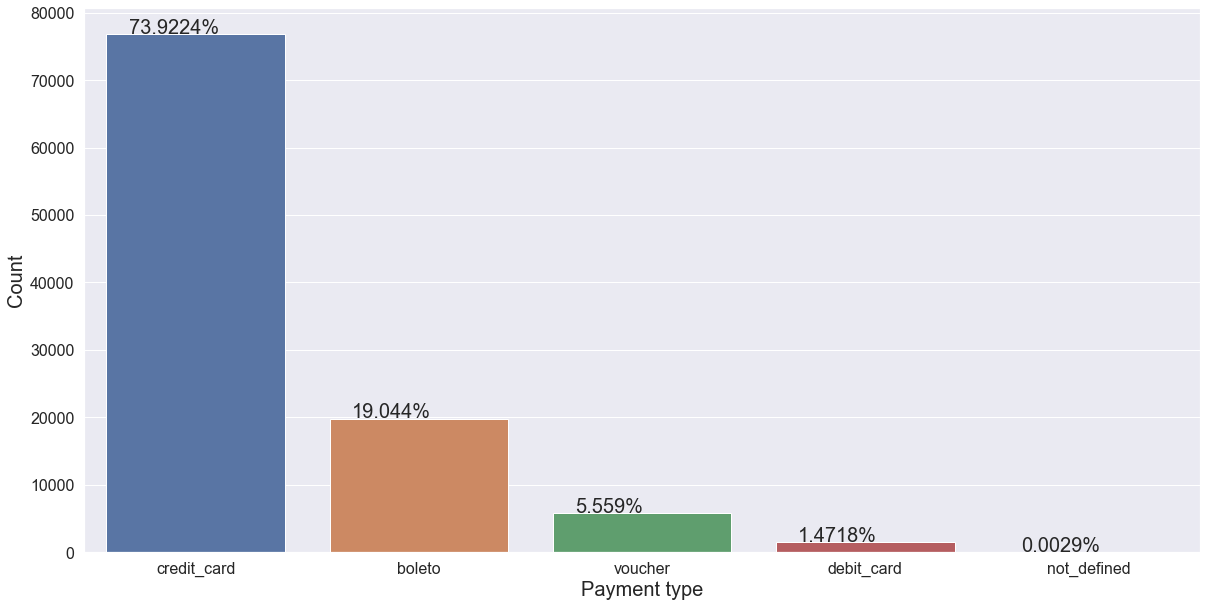

In [41]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.countplot(x='payment_type', data=payments_data)
total = len(payments_data['order_id'])

for p in ax.patches:
    value = round((p.get_height() / total) * 100, 4)
    x = p.get_x() + (p.get_width() / 2) - 0.3
    y = p.get_y() + p.get_height() + 100
    ax.text(x, y, str(value) + '%', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Payment type", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

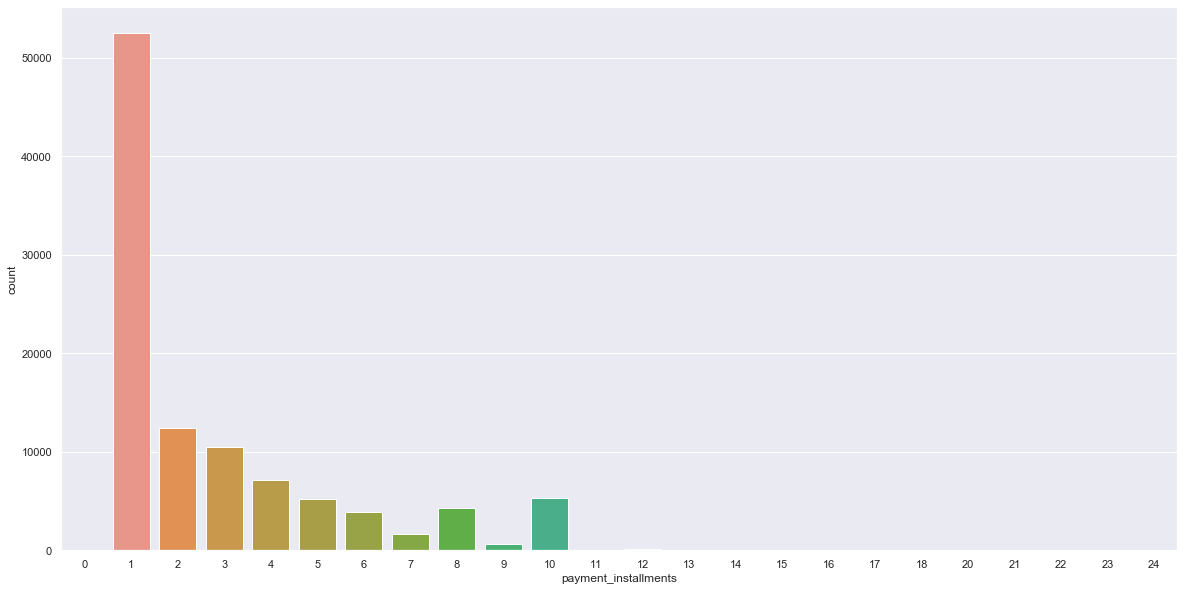

In [42]:
ax = sns.countplot(x='payment_installments', data=payments_data)

### Combine

In [43]:
payments_data[payments_data['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27995,31bc09fdbd701a7a4f9b55b5955b8687,3,voucher,1,37.88
39416,31bc09fdbd701a7a4f9b55b5955b8687,7,voucher,1,3.48
43160,31bc09fdbd701a7a4f9b55b5955b8687,4,voucher,1,40.33
45492,31bc09fdbd701a7a4f9b55b5955b8687,1,voucher,1,26.86
74317,31bc09fdbd701a7a4f9b55b5955b8687,5,voucher,1,22.28
82459,31bc09fdbd701a7a4f9b55b5955b8687,2,voucher,1,55.71
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99


In [44]:
payments_data2 = payments_data.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_installments': 'sum'
}).reset_index()

payments_data2.head()

,order_id,payment_value,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,259.83,3
2,000229ec398224ef6ca0657da4fc703e,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3


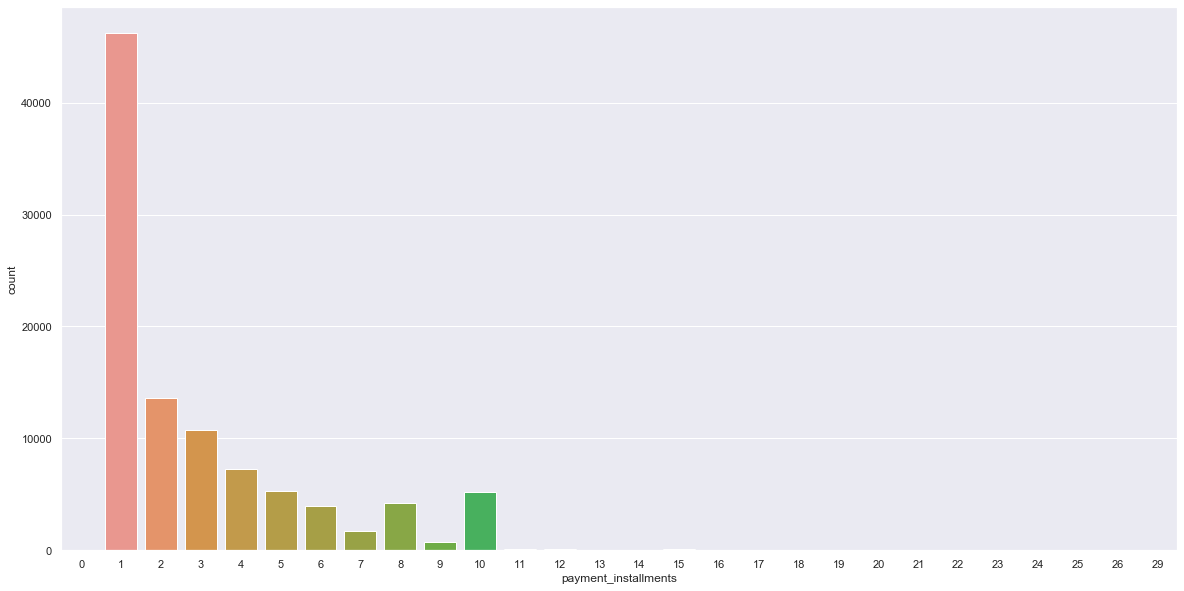

In [45]:
ax = sns.countplot(x='payment_installments', data=payments_data2)

In [46]:
payments_data2[payments_data2['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']

,order_id,payment_value,payment_installments
19242,31bc09fdbd701a7a4f9b55b5955b8687,264.53,7


In [47]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
df_tmp = pd.merge(orders_data, payments_data, on=["order_id"], how="inner")
df_tmp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


In [49]:
df_tmp2 = pd.merge(df_tmp, customers_data, on=["customer_id"], how="inner")
df_tmp2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [50]:
df_tmp2.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
count,103886.000000,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380,35072.550555
std,0.706584,2.687051,217.494064,29743.491677
min,1.000000,0.000000,0.000000,1003.000000
25%,1.000000,1.000000,56.790000,11366.250000
50%,1.000000,1.000000,100.000000,24360.000000
75%,1.000000,4.000000,171.837500,58418.000000
max,29.000000,24.000000,13664.080000,99990.000000
